## HMEQ Data Assignment 1 - Matt Gauden

In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# pd options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# read in file
INFILE = "/content/HMEQ_Loss.csv"

df = pd.read_csv(INFILE)

In [ ]:
df.head(10)

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,335.0,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1841.0,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,373.0,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,1217.0,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,1523.0,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [ ]:
# get data types
df.dtypes

,0
TARGET_BAD_FLAG,int64
TARGET_LOSS_AMT,float64
LOAN,int64
MORTDUE,float64
VALUE,float64
REASON,object
JOB,object
YOJ,float64
DEROG,float64
DELINQ,float64


In [ ]:
# describe data
x = df.describe().T
print(x)

                  count           mean           std          min  \
TARGET_BAD_FLAG  5960.0       0.199497      0.399656     0.000000   
TARGET_LOSS_AMT  1189.0   13414.576955  10839.455965   224.000000   
LOAN             5960.0   18607.969799  11207.480417  1100.000000   
MORTDUE          5442.0   73760.817200  44457.609458  2063.000000   
VALUE            5848.0  101776.048741  57385.775334  8000.000000   
YOJ              5445.0       8.922268      7.573982     0.000000   
DEROG            5252.0       0.254570      0.846047     0.000000   
DELINQ           5380.0       0.449442      1.127266     0.000000   
CLAGE            5652.0     179.766275     85.810092     0.000000   
NINQ             5450.0       1.186055      1.728675     0.000000   
CLNO             5738.0      21.296096     10.138933     0.000000   
DEBTINC          4693.0      33.779915      8.601746     0.524499   

                          25%           50%            75%            max  
TARGET_BAD_FLAG      0.000

In [ ]:
# assign data types to the variable 'dt'
dt = df.dtypes
print(dt)

TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object


## Exploring Input and Target Variables: Statistical Techniques

In [ ]:
# create lists for data types
obj_list = []
int_list = []
float_list = []

# define targets
TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

# loop through each
for i in dt.index:
    #print('here is i .....', i, '..... and here is the type', dt[i])
    if i in ( [TARGET_F, TARGET_A] ): continue
    if dt[i] in (['object']): obj_list.append(i)
    if dt[i] in (['float64']): float_list.append(i)
    if dt[i] in (['int64']): int_list.append(i)

# print objects
print(" OBJECTS ")
print(" ------- ")
for i in obj_list:
    print(i)

# print integers
print(" INTEGER ")
print(" ------- ")
for i in int_list:
    print(i)

# print floats
print(" FLOAT ")
print(" ----- ")
for i in float_list:
    print(i)

 OBJECTS 
 ------- 
REASON
JOB
 INTEGER 
 ------- 
LOAN
 FLOAT 
 ----- 
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [ ]:
# Explore the categorical / object variables
for i in obj_list:
    print("Class = ", i)
    g = df.groupby(i)
    print(g[i].count())

Class =  REASON
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Class =  JOB
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64


### Explanation
To start my exploration of the categorical variables, I used the groupby function to get a value count of the categories within each class.

In [ ]:
# Explore the categorical / object variables (continued)
for i in obj_list:
    print("Class = ", i)
    g = df.groupby(i)
    #print(g[i].count())
    x = g[TARGET_F].mean()
    print("Default Loan Prob", x)

Class =  REASON
Default Loan Prob REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
Class =  JOB
Default Loan Prob JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64


### Explanation
Similar to the lectures, we can extract the mean for our target flag variable (if the loan defaulted).The two jobs that are the "most likely" to default on a loan are Sales and Self-Employed. Logically, this makes sense. Sales jobs are reliant upon commission, skill, and business cylces. A person in a sales industry could have a bad quarter, or consecutive quarters, leading to unstable and varying income. The same goes for those who are self-employed. The benefits of being self-employed are high, but so are the risks if your business fails, which is what translates to a high average percentage of loans defaulting.

In [ ]:
# Explore the categorical / object variables (continued)
for i in obj_list:
    print("Class = ", i)
    g = df.groupby(i)
    #print(g[i].count())
    #x = g[TARGET_F].mean()
    #print("Default Loan Prob", x)
    x = g[TARGET_A].mean()
    print("Amount Lost", x)

Class =  REASON
Amount Lost REASON
DebtCon    16005.163758
HomeImp     8388.090909
Name: TARGET_LOSS_AMT, dtype: float64
Class =  JOB
Amount Lost JOB
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64


### Explanation
Just like what was seen above, both the Sales and Self job categories lead the rest of the pack in amount that is lost on a bad loan. Examining the Reason class, you see that DebtCon loans that default result in much higher losses (almost double the amount) than HomeImp loans.

In [ ]:
# Explore the continuous variables
print("INTEGER VARIABLES")
print("\n")
for i in int_list:
    print("Variable = ", i)
    g = df.groupby(TARGET_F)
    x = g[i].mean()
    print("Loan Amount", x)

INTEGER VARIABLES


Variable =  LOAN
Loan Amount TARGET_BAD_FLAG
0    19028.107315
1    16922.119428
Name: LOAN, dtype: float64


### Explanation
It's interesting to see that the loans that defaulted were on average worth less than the loans that did not.

In [ ]:
# Explore the continuous variables (continued)
print("INTEGER VARIABLES")
print("\n")
for i in int_list:
    print("Variable = ", i)
    g = df.groupby(TARGET_F)
    x = g[i].mean()
    print("Loan Amount", x)
    c = df[i].corr(df[TARGET_A])
    c = round(100*c, 1)
    print("Correlation = ", c, "%")

INTEGER VARIABLES


Variable =  LOAN
Loan Amount TARGET_BAD_FLAG
0    19028.107315
1    16922.119428
Name: LOAN, dtype: float64
Correlation =  83.7 %


### Explanation
The results of the correlation test seem to be counterintuitive to the conventional wisdom found in the data dictionary. The conventional wisdom is that the higher the loan, the riskier the person. We see an 83.7% correlation between the amount of the loan and the amount lost once defaulted. However, based on what we found in the earlier experiment, in this data set the loans that went bad were actually lower than the ones that did not.

In [ ]:
# Explore the float variables
print("FLOAT VARIABLES")
print("\n")
for i in float_list:
    print("Variable = ", i)
    g = df.groupby(TARGET_F)
    x = g[i].mean()
    print("Loan Amount", x)
    c = df[i].corr(df[TARGET_A])
    c = round(100*c, 1)
    print("Correlation = ", c, "%")
    print("\n")

FLOAT VARIABLES


Variable =  MORTDUE
Loan Amount TARGET_BAD_FLAG
0    74829.249055
1    69460.452973
Name: MORTDUE, dtype: float64
Correlation =  34.9 %


Variable =  VALUE
Loan Amount TARGET_BAD_FLAG
0    102595.921018
1     98172.846227
Name: VALUE, dtype: float64
Correlation =  36.7 %


Variable =  YOJ
Loan Amount TARGET_BAD_FLAG
0    9.154941
1    8.027802
Name: YOJ, dtype: float64
Correlation =  1.8 %


Variable =  DEROG
Loan Amount TARGET_BAD_FLAG
0    0.134217
1    0.707804
Name: DEROG, dtype: float64
Correlation =  9.5 %


Variable =  DELINQ
Loan Amount TARGET_BAD_FLAG
0    0.245133
1    1.229185
Name: DELINQ, dtype: float64
Correlation =  22.7 %


Variable =  CLAGE
Loan Amount TARGET_BAD_FLAG
0    187.002355
1    150.190183
Name: CLAGE, dtype: float64
Correlation =  1.4 %


Variable =  NINQ
Loan Amount TARGET_BAD_FLAG
0    1.032749
1    1.782765
Name: NINQ, dtype: float64
Correlation =  14.3 %


Variable =  CLNO
Loan Amount TARGET_BAD_FLAG
0    21.317036
1    21.211268
Name: 

### Explanation
When examining the floating point variables, some of the results fall in line with conventional wisdom, and some do not. If you look at DEBTINC, there's a fairly strong 37.8% correlation between the loan defaulting and a person's debt-to-income ratio. The conventional wisdom tells us the higher the ratio, the riskier a person is because they can't pay their bills, and this is reflected in the findings as the ratio is higher for those where the loan defaulted. The same goes for DELINQ, and DEROG.

However, other variables like MORTDUE, go against conventional wisdom. One would expect that the more you owe on your house, the riskier you would be. The experiment shows that the average outstanding mortgage balance on the loans that defaulted was actually less than the loans that did not. There are also variables like YOJ which show very little correlation to bad loans.

## Exploring Input and Target Variables: Visualizations

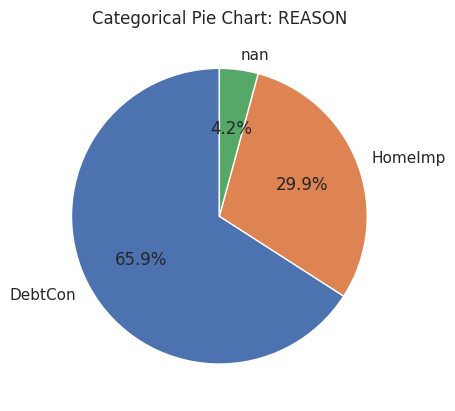

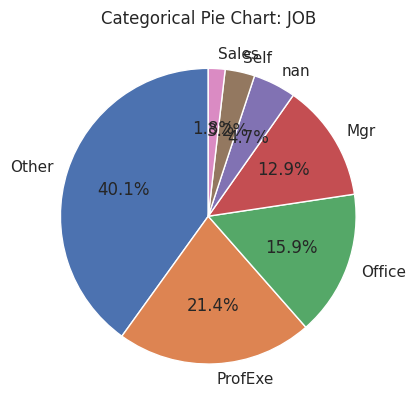

In [ ]:
# Pie Chart - Categorical Variables
for i in obj_list:
    x = df[i].value_counts(dropna=False)
    #print(x)
    theLabels = x.axes[0].tolist()
    #print(theLabels)
    theSlices = list(x)
    #print(theSlices)
    plt.pie(theSlices,
    labels = theLabels,
    startangle = 90,
    autopct = "%1.1f%%")
    plt.title("Categorical Pie Chart: " + i)
    plt.show()

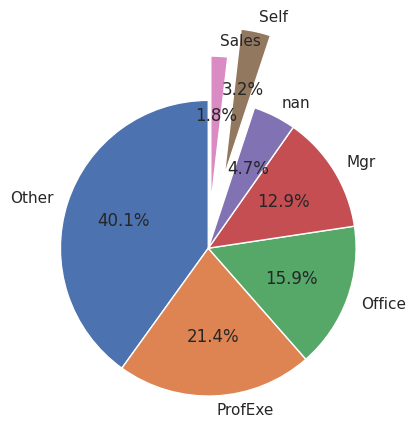

In [ ]:
# Exploding Sales and Self to make it easier to read
x = df["JOB"].value_counts(dropna=False)
theLabels = x.axes[0].tolist()
theSlices = list(x)
explodeList = [0 for i in theSlices]
explodeList[5] = 0.5
explodeList[6] = 0.3
plt.pie(theSlices,
        labels = theLabels,
        startangle = 90,
        explode = explodeList,
        autopct = "%1.1f%%")
plt.show()

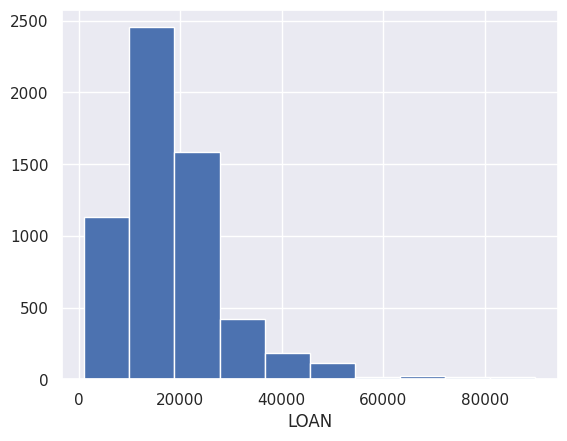

In [ ]:
# Histogram for Integer Variables
for i in int_list:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

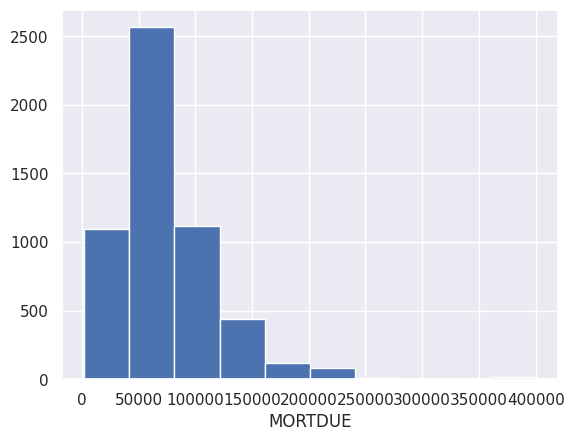

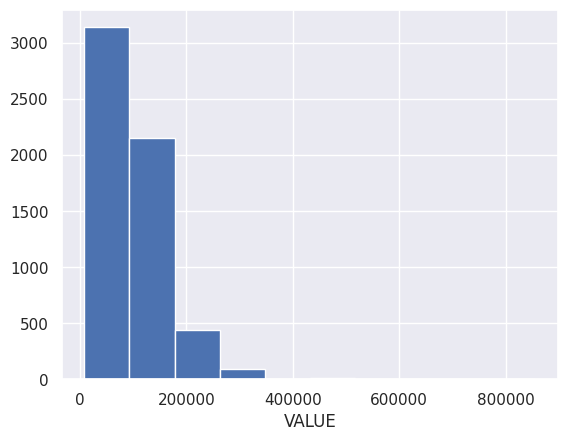

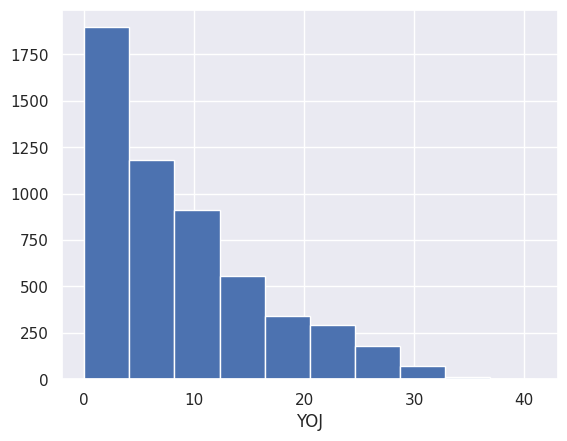

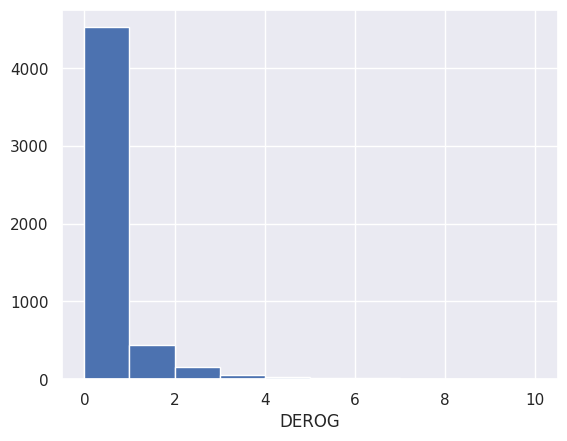

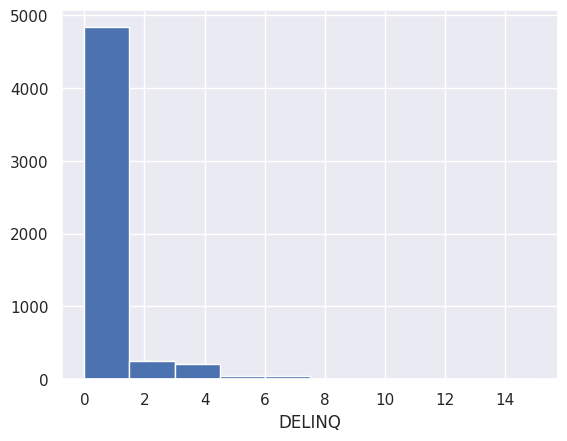

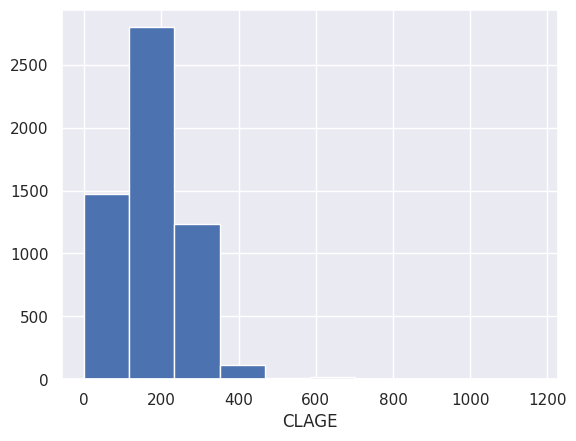

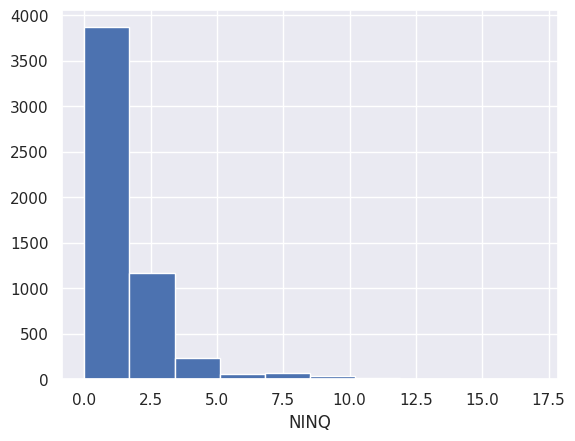

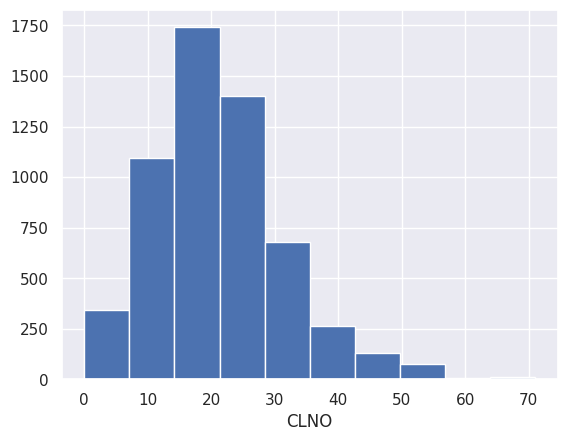

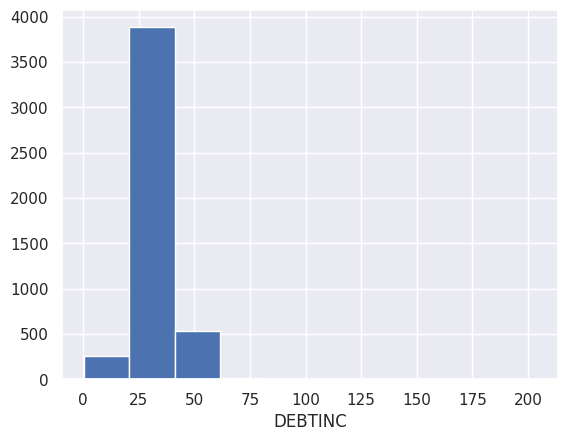

In [ ]:
# Histogram for Float Variables
for i in float_list:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

### Explanation
One can see that for both the integer and float variables, the histograms are all negatively distributed. This makes sense as the more extreme the variables get, the fewer people there are that fall in that category.

## Missing Value Imputation

In [ ]:
# Explore Categorical Variables
objList = []
for i in dt.index:
    print("here is i....", i, ".... and here is the type", dt[i])
    if i in ([TARGET_F, TARGET_A]): continue
    if dt[i] in (["object"]): objList.append(i)

print("OBJECTS")
print("-------")
for i in objList:
    print(i)
    print("-------")


here is i.... TARGET_BAD_FLAG .... and here is the type int64
here is i.... TARGET_LOSS_AMT .... and here is the type float64
here is i.... LOAN .... and here is the type int64
here is i.... MORTDUE .... and here is the type float64
here is i.... VALUE .... and here is the type float64
here is i.... REASON .... and here is the type object
here is i.... JOB .... and here is the type object
here is i.... YOJ .... and here is the type float64
here is i.... DEROG .... and here is the type float64
here is i.... DELINQ .... and here is the type float64
here is i.... CLAGE .... and here is the type float64
here is i.... NINQ .... and here is the type float64
here is i.... CLNO .... and here is the type float64
here is i.... DEBTINC .... and here is the type float64
OBJECTS
-------
REASON
-------
JOB
-------


In [ ]:
for i in objList:
    print(i)
    print(df[i].unique())
    g = df.groupby(i)
    print(g[i].count())
    print("MOST COMMON = ", df[i].mode()[0])
    print("MISSING = ", df[i].isna().sum())
    print("\n\n")

REASON
['HomeImp' nan 'DebtCon']
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
MOST COMMON =  DebtCon
MISSING =  252



JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
MOST COMMON =  Other
MISSING =  279





In [ ]:
for i in objList:
    if df[i].isna().sum() == 0: continue
    print(i)
    print("HAS MISSING")
    NAME = "IMP_"+i
    print(NAME)
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby(NAME)
    print(g[NAME].count())
    print("\n\n")
    df = df.drop(i, axis=1)

print(df.head(10).T)

REASON
HAS MISSING
IMP_REASON
IMP_REASON
DebtCon    3928
HomeImp    1780
MISSING     252
Name: IMP_REASON, dtype: int64



JOB
HAS MISSING
IMP_JOB
IMP_JOB
MISSING     279
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: IMP_JOB, dtype: int64



                         0           1           2        3          4  \
TARGET_BAD_FLAG          1           1           1        1          0   
TARGET_LOSS_AMT      641.0      1109.0       767.0   1425.0        NaN   
LOAN                  1100        1300        1500     1500       1700   
MORTDUE            25860.0     70053.0     13500.0      NaN    97800.0   
VALUE              39025.0     68400.0     16700.0      NaN   112000.0   
YOJ                   10.5         7.0         4.0      NaN        3.0   
DEROG                  0.0         0.0         0.0      NaN        0.0   
DELINQ                 0.0         2.0         0.0      NaN        0.0   
CLAGE            94.366667  121.8333

### Explanation
Here, I decided to use the "MISSING" method to impute the missing values of both the categorical and continuous variables.

### Fixing Continuous Variables

In [ ]:
# Put continuous variables in a list
dt = df.dtypes
objList = []
numList = []
for i in dt.index:
    if i in ([TARGET_F, TARGET_A]): continue
    if dt[i] in (["object"]): objList.append(i)
    if dt[i] in (["float64","int64"]): numList.append(i)


print("NUMBERS")
print("-------")
for i in numList:
    print(i)
print("-------")


NUMBERS
-------
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC
-------


In [ ]:
# Fixing missing values
for i in numList:
    if df[i].isna().sum() == 0: continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    df[FLAG] = df[i].isna() + 0
    df[IMP] = df[i]
    df.loc[df[IMP].isna(), IMP] = df[i].median()
    df = df.drop(i, axis=1)

print(df.head().T)

                         0           1           2           3          4
TARGET_BAD_FLAG          1           1           1           1          0
TARGET_LOSS_AMT      641.0      1109.0       767.0      1425.0        NaN
LOAN                  1100        1300        1500        1500       1700
IMP_REASON         HomeImp     HomeImp     HomeImp     MISSING    HomeImp
IMP_JOB              Other       Other       Other     MISSING     Office
M_MORTDUE                0           0           0           1          0
IMP_MORTDUE        25860.0     70053.0     13500.0     65019.0    97800.0
M_VALUE                  0           0           0           1          0
IMP_VALUE          39025.0     68400.0     16700.0     89235.5   112000.0
M_YOJ                    0           0           0           1          0
IMP_YOJ               10.5         7.0         4.0         7.0        3.0
M_DEROG                  0           0           0           1          0
IMP_DEROG              0.0         0.0

## Converting Categorical Variables Into Numeric Variables

In [ ]:
# One Hot Encoding
dt = df.dtypes
objList= []
for i in dt.index:
    if i in ([TARGET_F, TARGET_A]): continue
    if dt[i] in (["object"]): objList.append(i)

for i in objList:
    #print("Class = ", i)
    thePrefix = "z_" + i
    #print(thePrefix)
    #y = pd.get_dummies(df[i], prefix=thePrefix, dummy_na=False)
    y = pd.get_dummies(df[i], prefix=thePrefix, dummy_na=False, drop_first=True)
    #print(type(y))
    #print(y.head().T)
    df = pd.concat([df, y], axis=1)
    df = df.drop(i, axis=1)

print(df.head().T)

                              0           1           2           3          4
TARGET_BAD_FLAG               1           1           1           1          0
TARGET_LOSS_AMT           641.0      1109.0       767.0      1425.0        NaN
LOAN                       1100        1300        1500        1500       1700
M_MORTDUE                     0           0           0           1          0
IMP_MORTDUE             25860.0     70053.0     13500.0     65019.0    97800.0
M_VALUE                       0           0           0           1          0
IMP_VALUE               39025.0     68400.0     16700.0     89235.5   112000.0
M_YOJ                         0           0           0           1          0
IMP_YOJ                    10.5         7.0         4.0         7.0        3.0
M_DEROG                       0           0           0           1          0
IMP_DEROG                   0.0         0.0         0.0         0.0        0.0
M_DELINQ                      0           0         

In [ ]:
# Turning True/False to numerical values by hand
df["z_REASON_HomeImp_Yes"] = (df["z_IMP_REASON_HomeImp"] + 0)
df = df.drop("z_IMP_REASON_HomeImp", axis=1)

df["z_REASON_MISSING_Yes"] = (df["z_IMP_REASON_MISSING"] + 0)
df = df.drop("z_IMP_REASON_MISSING", axis=1)

df["z_JOB_Mgr_Yes"] = (df["z_IMP_JOB_Mgr"] + 0)
df = df.drop("z_IMP_JOB_Mgr", axis=1)

df["z_JOB_Office_Yes"] = (df["z_IMP_JOB_Office"] + 0)
df = df.drop("z_IMP_JOB_Office", axis=1)

df["z_JOB_Other_Yes"] = (df["z_IMP_JOB_Other"] + 0)
df = df.drop("z_IMP_JOB_Other", axis=1)

df["z_JOB_ProfExe_Yes"] = (df["z_IMP_JOB_ProfExe"] + 0)
df = df.drop("z_IMP_JOB_ProfExe", axis=1)

df["z_JOB_Sales_Yes"] = (df["z_IMP_JOB_Sales"] + 0)
df = df.drop("z_IMP_JOB_Sales", axis=1)

df["z_JOB_Self_Yes"] = (df["z_IMP_JOB_Self"] + 0)
df = df.drop("z_IMP_JOB_Self", axis=1)


print(df.head().T)

                                 0             1             2             3  \
TARGET_BAD_FLAG           1.000000      1.000000      1.000000      1.000000   
TARGET_LOSS_AMT         641.000000   1109.000000    767.000000   1425.000000   
LOAN                   1100.000000   1300.000000   1500.000000   1500.000000   
M_MORTDUE                 0.000000      0.000000      0.000000      1.000000   
IMP_MORTDUE           25860.000000  70053.000000  13500.000000  65019.000000   
M_VALUE                   0.000000      0.000000      0.000000      1.000000   
IMP_VALUE             39025.000000  68400.000000  16700.000000  89235.500000   
M_YOJ                     0.000000      0.000000      0.000000      1.000000   
IMP_YOJ                  10.500000      7.000000      4.000000      7.000000   
M_DEROG                   0.000000      0.000000      0.000000      1.000000   
IMP_DEROG                 0.000000      0.000000      0.000000      0.000000   
M_DELINQ                  0.000000      

## HMEQ Data Assignment 2

In [ ]:
# Import modules
from sklearn.model_selection import train_test_split

In [ ]:
# Split data
X = df.copy()
X = X.drop(TARGET_F, axis=1)
X = X.drop(TARGET_A, axis=1)
#X.head()

# Put targets into separate variable
Y = df[[TARGET_F, TARGET_A]]
#Y.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
print("FLAG DATA")
print("TRAINING = ", X_train.shape)
print("TEST = ", X_test.shape)

FLAG DATA
TRAINING =  (4768, 27)
TEST =  (1192, 27)


### Decision Tree

In [ ]:
# Import modules
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree

In [ ]:
# Build decision tree
fm01_tree = tree.DecisionTreeClassifier(max_depth=5)
fm01_tree = fm01_tree.fit(X_train, Y_train[TARGET_F])

Y_pred_train = fm01_tree.predict(X_train)
Y_pred_test = fm01_tree.predict(X_test)

print("Probability of Default")
print("Accuracy Train:", metrics.accuracy_score(Y_train[TARGET_F], Y_pred_train))
print("Accuracy Test:", metrics.accuracy_score(Y_test[TARGET_F], Y_pred_test))


Probability of Default
Accuracy Train: 0.8974412751677853
Accuracy Test: 0.8884228187919463


### Summary:
- Model seems accurate, both the Accuracy Test and Training data are close together.
- Both are around 89%

In [ ]:
# Training data
probs = fm01_tree.predict_proba(X_train)
p1 = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

# Test data
probs = fm01_tree.predict_proba(X_test)
p1 = probs[:,1]

fpr_test, tpr_test, threshold = metrics.roc_curve(Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

<ipython-input-33-35ab21932cd3>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')


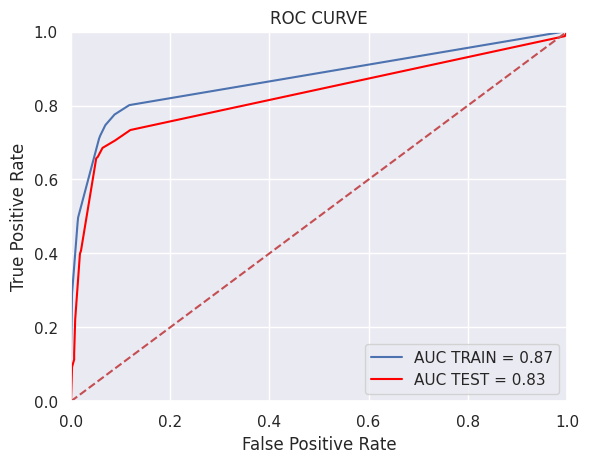

In [ ]:
# Build ROC Curve
plt.title("ROC CURVE")
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Display Decision Tree
!pip install graphviz
import graphviz


feature_cols = list(X.columns.values)
tree.export_graphviz(fm01_tree,out_file='tree_f.txt', filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"])



In [ ]:
# Return variables used in tree
def getTreeVars(TREE, varNames):
    tree_ = TREE.tree_
    varName = [varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature]

    nameSet = set()
    for i in tree_.feature:
        if i != _tree.TREE_UNDEFINED:
            nameSet.add(i)
    nameList = list(nameSet)
    parameter_list = list()
    for i in nameList:
        parameter_list.append(varNames[i])
    return parameter_list

vars_tree_flag = getTreeVars(fm01_tree, feature_cols)
for i in vars_tree_flag:
    print(i)

M_VALUE
IMP_VALUE
M_YOJ
IMP_YOJ
M_DEROG
IMP_DEROG
IMP_DELINQ
IMP_CLAGE
IMP_NINQ
M_DEBTINC
IMP_DEBTINC
z_JOB_Sales_Yes


### Summary:
- These are the variables that seem to be the highest predictors of a loan defaulting. I believe these make sense given what we know about these fields thus far. If values such as delinquincies, derogatory marks on your credit record, and debt-to-income-ratio are high, then they lead to a higher risk of defaulting on a loan. The same goes for fields like mortgage due, and whether or not you have a sales job. A sales job we know is more volatile, leading to unstable income and perhaps a higher risk of default.
- However, it should be noted that some of these make less sense. Years on job, for instance, is a sign of a good employee with a stable job. However, the model suggests you're at a higher risk of defaulting if you've been on the job longer, which is interesting.

### Regression Tree for Loss Amount On Loan Default

In [ ]:
# Create flag varuiable for TARGET_A
F = ~ Y_train[TARGET_A].isna()
#Y_train.head()
#F[0:5]

# New variables
W_train = X_train[F]
Z_train = Y_train[F]
Z_train.head()

F = ~ Y_test[TARGET_A].isna()
W_test = X_test[F]
Z_test = Y_test[F]

In [ ]:
import math
amt_m01_Tree = tree.DecisionTreeRegressor(max_depth=3)
amt_m01_Tree = amt_m01_Tree.fit(W_train, Z_train[TARGET_A])

# Prediction values
Z_Pred_train = amt_m01_Tree.predict(W_train)
Z_Pred_test = amt_m01_Tree.predict(W_test)

RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("TREE RMSE Train:", RMSE_TRAIN)
print("TREE RMSE Test:", RMSE_TEST)



TREE RMSE Train: 5423.81409721877
TREE RMSE Test: 6809.8980977949295


In [ ]:
# Graphviz
RMSE_TREE = RMSE_TEST

feature_cols = list(X.columns.values)
vars_tree_amt = getTreeVars(amt_m01_Tree, feature_cols)
tree.export_graphviz(amt_m01_Tree,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0)

# Look at variables
for i in vars_tree_amt:
    print(i)

LOAN
IMP_CLNO
IMP_DEBTINC


### Summary:
- When examining the fields that are predictive to a high loss amount on a defaulted loan, we don't find anything too surprising from the regression model.
- First, it is reasonable to assume that the higher the loan itself, then the higher the risk of defaulting. If you borrow a very large sum, it is harder to pay back than a smaller amount.
- The CLNO field deals with how many credit lines the individual has open. Again, this is unsurprising to see the regression suggest it is predictive of a high default amount. The more credit you are responsible for paying, the less you would likely have available to pay for the loan amount.
- Debt-to-income-ratio makes sense as well for the same reason it is predictive for defaulting on a loan in the first place, people with higher debt in relation to their income are more likely to default.
- It should be noted that no job fields are predictive of a high loss amount. So, while a person in a sales industry is more likely to default on a loan, it doesn't necessarily mean the loss will be higher than any other job type.

## Random Forests

In [ ]:
# Random forest modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Gradient boosting modules
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

from operator import itemgetter

In [ ]:
# Create random forest
fm01_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
fm01_RF = fm01_RF.fit(X_train, Y_train[TARGET_F])

Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)

print("\n=============\n")
print("RANDOM FOREST\n")
print("Accuracy Train:", metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:", metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")



RANDOM FOREST

Accuracy Train: 1.0
Accuracy Test: 0.915268456375839




<ipython-input-41-6769a12a028e>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr_test, tpr_test, 'b', label = 'RF TEST = %0.2f' % roc_auc_test, color = 'red')


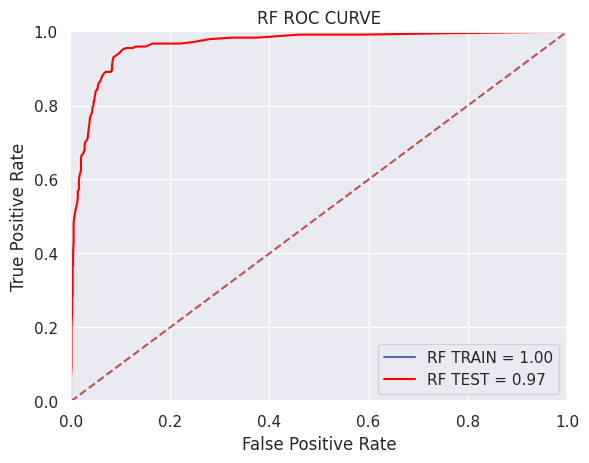

In [ ]:
# Create ROC Curves
probs = fm01_RF.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

# Save test data
fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test

# Build ROC Curve
plt.title("RF ROC CURVE")
plt.plot(fpr_train, tpr_train, 'b', label = 'RF TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'RF TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
# Get variables
def getEnsembleTreeVars(ENSTREE, varNames):
    importance = ENSTREE.feature_importances_
    avg_importance = np.average(importance)
    important_indices = np.where(importance > avg_importance)[0]
    important_vars = [varNames[i] for i in important_indices]
    return(important_vars)

vars_RF_flag = getEnsembleTreeVars(fm01_RF, feature_cols)
print(vars_RF_flag)



#feature_cols = list(X.columns.values)
#vars_RF_flag = getEnsembleTreeVars(fm01_RF, feature_cols)
#for i in vars_RF_flag:
#    print(i)

['LOAN', 'IMP_MORTDUE', 'IMP_VALUE', 'IMP_YOJ', 'IMP_DEROG', 'IMP_DELINQ', 'IMP_CLAGE', 'IMP_NINQ', 'IMP_CLNO', 'M_DEBTINC', 'IMP_DEBTINC']


## Random Forest Regression - Loss Amount

In [ ]:
amt_m01_RF = RandomForestRegressor(n_estimators = 100, random_state=1)
amt_m01_RF = amt_m01_RF.fit(W_train, Z_train[TARGET_A])

Z_Pred_train = amt_m01_RF.predict(W_train)
Z_Pred_test = amt_m01_RF.predict(W_test)

RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("RF RMSE Train:", RMSE_TRAIN)
print("RF RMSE Test:", RMSE_TEST)

RF RMSE Train: 1235.205526193344
RF RMSE Test: 3202.24610722277


In [ ]:
# Get variables
feature_cols = list(X.columns.values)
vars_RF_amt = getEnsembleTreeVars(amt_m01_RF, feature_cols)
for i in vars_RF_amt:
    print(i)

LOAN
IMP_CLNO
IMP_DEBTINC


## Gradient Boosting

In [ ]:
# Create gradient boosting classifier
fm01_GB = GradientBoostingClassifier(random_state=1)
fm01_GB = fm01_GB.fit(X_train, Y_train[TARGET_F])

Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)

print("\n=============\n")
print("GRADIENT BOOSTING\n")
print("Accuracy Train:", metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:", metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")



GRADIENT BOOSTING

Accuracy Train: 0.9236577181208053
Accuracy Test: 0.9035234899328859




<ipython-input-46-c42aa35823c8>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr_test, tpr_test, 'b', label = 'GB TEST = %0.2f' % roc_auc_test, color = 'red')


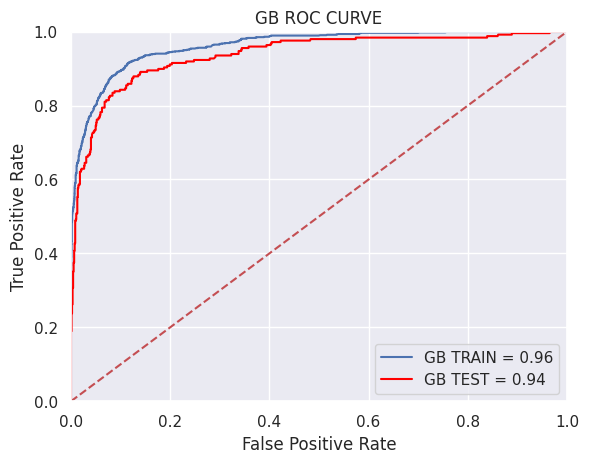

In [ ]:
# Create ROC Curves
probs = fm01_GB.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

# Save test data
fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

# Build ROC Curve
plt.title("GB ROC CURVE")
plt.plot(fpr_train, tpr_train, 'b', label = 'GB TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'GB TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Get variables
feature_cols = list(X.columns.values)
vars_GB_flag = getEnsembleTreeVars(fm01_GB, feature_cols)
for i in vars_GB_flag:
    print(i)

IMP_DELINQ
IMP_CLAGE
M_DEBTINC
IMP_DEBTINC


## Gradient Boosting Regression

In [ ]:
amt_m01_GB = GradientBoostingRegressor(random_state=1)
amt_m01_GB = amt_m01_GB.fit(W_train, Z_train[TARGET_A])

Z_Pred_train = amt_m01_GB.predict(W_train)
Z_Pred_test = amt_m01_GB.predict(W_test)

RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("GB RMSE Train:", RMSE_TRAIN)
print("GB RMSE Test:", RMSE_TEST)

# Get variables
feature_cols = list(X.columns.values)
vars_GB_amt = getEnsembleTreeVars(amt_m01_GB, feature_cols)
for i in vars_GB_amt:
    print(i)

GB RMSE Train: 1218.1569933684327
GB RMSE Test: 2541.508546397616
LOAN
IMP_CLNO
M_DEBTINC
IMP_DEBTINC


## Final ROC Curve - All Three Models

<ipython-input-49-63ad8366cc4c>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC TREE = %0.2f' % auc_tree, color = "red")
<ipython-input-49-63ad8366cc4c>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC RF = %0.2f' % auc_tree, color = "orange")
<ipython-input-49-63ad8366cc4c>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr_GB, tpr_GB, 'b', label = 'AUC GB = %0.2f' % auc_tree, c

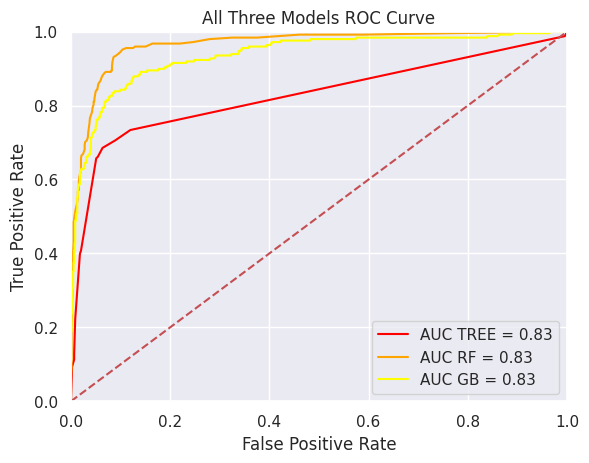

In [ ]:
# Build ROC Curve
plt.title("All Three Models ROC Curve")
plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC TREE = %0.2f' % auc_tree, color = "red")
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC RF = %0.2f' % auc_tree, color = "orange")
plt.plot(fpr_GB, tpr_GB, 'b', label = 'AUC GB = %0.2f' % auc_tree, color = "yellow")
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Summary:
- If I were to choose one model, I would choose the Decision Tree.
- While simple, it is still able to give clear indications of predictive variables in the dataset. These can provide great insights into what the data suggests and the story it is telling.
- Decision Trees are also capable of handling missing values, possibly make a step such as imputation unecessary.
- I also believe, in a corporate setting, people need clear direction and initiatives. With a Decision Tree, the model can provide clear IF-THEN-ELSE rules which are easy to translate to a nontechnical audience that may see the model and not understand the technical aspects such as the underlying code.
- The downside, is that the model is insensitive to outliers, and that outliers may need to be handled manually if they start to taint the data.

## HMEQ Data Assignment 3

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Model Accuracy Functions
def getProbAccuracyScores(NAME, MODEL, X, Y):
  pred = MODEL.predict(X)
  probs = MODEL.predict_proba(X)
  acc_score = metrics.accuracy_score(Y, pred)
  p1 = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(Y, p1)
  roc_auc = metrics.auc(fpr, tpr)
  return[NAME, acc_score, fpr, tpr, roc_auc, acc_score]


WHO = "TREE"

CLM = tree.DecisionTreeClassifier(max_depth=5)
CLM = CLM.fit(X_train, Y_train[TARGET_F])

TRAIN_CLM = getProbAccuracyScores(WHO + " Tree Train", CLM, X_train, Y_train[TARGET_F])
TEST_CLM = getProbAccuracyScores(WHO, CLM, X_test, Y_test[TARGET_F])

In [ ]:
# ROC Curve Function
def print_ROC_Curve(TITLE, LIST):
  fig = plt.figure(figsize=(8,6))
  plt.title(TITLE)
  for theResults in LIST:
    NAME = theResults[0]
    fpr = theResults[2]
    tpr = theResults[3]
    roc_auc = theResults[4]
    theLabel = 'AUC' + NAME + ' = %0.2f' % roc_auc
    plt.plot(fpr, tpr, label = theLabel)
  plt.legend(loc = 'lower right')
  plt.plot([0,1], [0,1], 'r--')
  plt.xlim([0,1])
  plt.ylim([0,1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

# Accuracy List Function
def print_Accuracy(TITLE, LIST):
  print(TITLE)
  print("========")
  for theResults in LIST:
    NAME = theResults[0]
    ACC = theResults[1]
    print(NAME, " = ", ACC)
    print("------\n\n")

# Amount Accuracy Scores Function
def getAmtAccuracyScores(NAME, MODEL, X, Y):
  pred = MODEL.predict(X)
  MEAN = Y.mean()
  RMSE = math.sqrt(metrics.mean_squared_error(Y, pred))
  return[NAME, RMSE, MEAN]

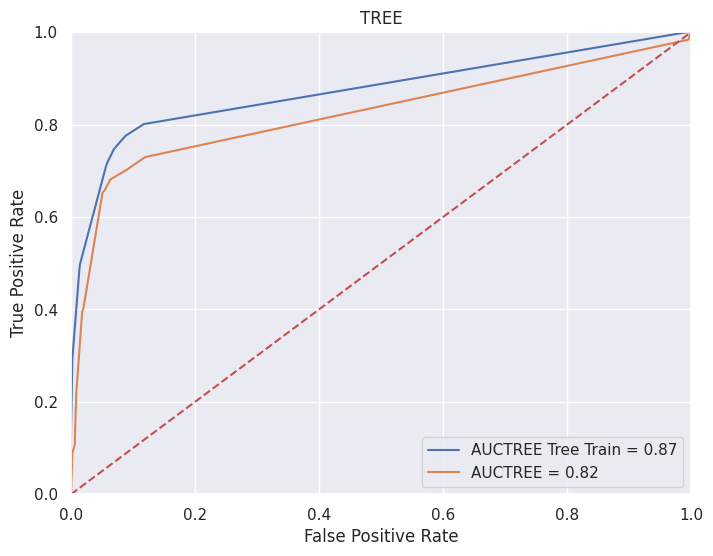

TREE CLASSIFICATION ACCURACY
TREE Tree Train  =  0.8974412751677853
------


TREE  =  0.8875838926174496
------




['M_VALUE',
 'IMP_VALUE',
 'M_YOJ',
 'IMP_YOJ',
 'M_DEROG',
 'IMP_DEROG',
 'IMP_DELINQ',
 'IMP_CLAGE',
 'M_DEBTINC',
 'IMP_DEBTINC',
 'z_JOB_Sales_Yes']

In [ ]:
print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM])
print_Accuracy(WHO + " CLASSIFICATION ACCURACY", [TRAIN_CLM, TEST_CLM])
feature_cols = list(X.columns.values)
tree.export_graphviz(CLM,out_file='tree_f.txt', filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"])
vars_tree_flag = getTreeVars(CLM, feature_cols)
vars_tree_flag

## Summary
For the loan default prediction tree, the training set had a slightly higher accuracy than the test data. However, the margin was small and both models were accurate.

In [ ]:
# Repeat Process for Loss Amount
AMT = tree.DecisionTreeRegressor(max_depth=3)
AMT = AMT.fit(W_train, Z_train[TARGET_A])

TRAIN_AMT = getAmtAccuracyScores(WHO + " Train", AMT, W_train, Z_train[TARGET_A])
TEST_AMT = getAmtAccuracyScores(WHO, AMT, W_test, Z_test[TARGET_A])
print_Accuracy(WHO + " RMSE Accuracy", [TRAIN_AMT, TEST_AMT])

feature_cols = list(X.columns.values)
tree.export_graphviz(AMT,out_file='tree_f.txt', filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"])
vars_tree_amt = getTreeVars(AMT, feature_cols)
vars_tree_amt

# Save Train and Test Classifier
TREE_CLM = TEST_CLM.copy()
TREE_AMT = TEST_AMT.copy()

TREE RMSE Accuracy
TREE Train  =  5423.81409721877
------


TREE  =  6809.8980977949295
------




## Summary
For the loan loss amount tree model, the accuracy on the test data set displayed a greater loss than the training data set. There was a difference of about $1,386 between the sets.

## Random Forest

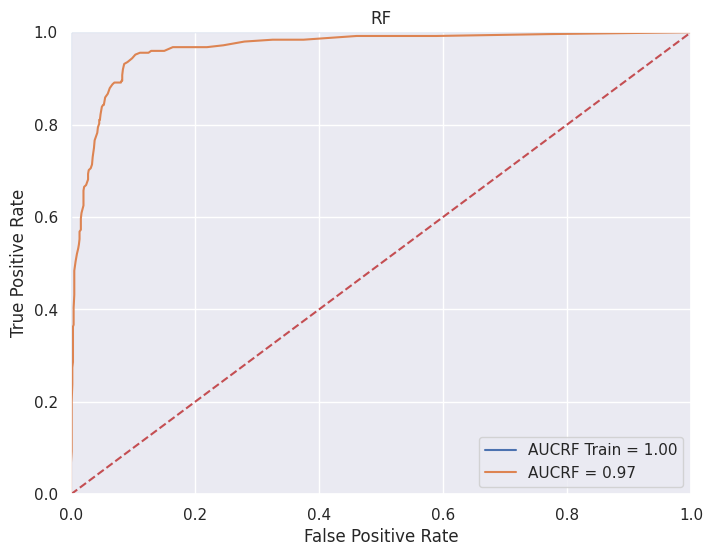

RF CLASSIFICATION ACCURACY
RF Train  =  1.0
------


RF  =  0.915268456375839
------


LOAN
IMP_MORTDUE
IMP_VALUE
IMP_YOJ
IMP_DEROG
IMP_DELINQ
IMP_CLAGE
IMP_NINQ
IMP_CLNO
M_DEBTINC
IMP_DEBTINC


In [ ]:
WHO = "RF"

CLM = RandomForestClassifier(n_estimators = 100, random_state=1)
CLM = CLM.fit(X_train, Y_train[TARGET_F])

TRAIN_CLM = getProbAccuracyScores(WHO + " Train", CLM, X_train, Y_train[TARGET_F])
TEST_CLM = getProbAccuracyScores(WHO, CLM, X_test, Y_test[TARGET_F])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM])
print_Accuracy(WHO + " CLASSIFICATION ACCURACY", [TRAIN_CLM, TEST_CLM])
feature_cols = list(X.columns.values)
vars_RF_flag = getEnsembleTreeVars(CLM, feature_cols)
for i in vars_RF_flag:
    print(i)

## Summary
The classification accuracy for the RF model showed a perfect accuracy score for the training data set, and a high 91% accuracy for the test data.

In [ ]:
# Random Forest Loss Amount
AMT = RandomForestRegressor(max_depth=3)
AMT = AMT.fit(W_train, Z_train[TARGET_A])

TRAIN_AMT = getAmtAccuracyScores(WHO + " Train", AMT, W_train, Z_train[TARGET_A])
TEST_AMT = getAmtAccuracyScores(WHO, AMT, W_test, Z_test[TARGET_A])
print_Accuracy(WHO + " RMSE Accuracy", [TRAIN_AMT, TEST_AMT])

feature_cols = list(X.columns.values)
vars_RF_amt = getEnsembleTreeVars(AMT, feature_cols)
for i in vars_RF_amt:
  print(i)

RF_CLM =  TEST_CLM.copy()
RF_AMT = TEST_AMT.copy()

RF RMSE Accuracy
RF Train  =  4585.315806587839
------


RF  =  5634.178003041123
------


LOAN
IMP_CLNO


## Summary
The loan loss amount was greater for the test data set in the RF model. This coincides with the Tree model as well, which also displayed a higher loss in the test data.

## Gradient Boosting

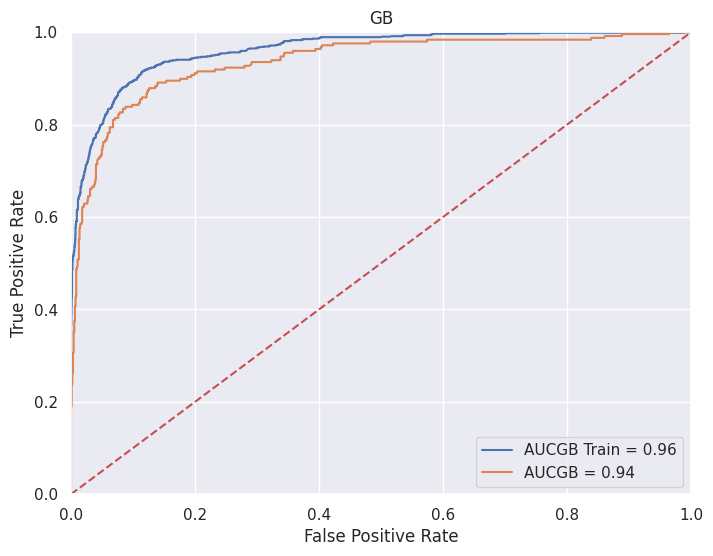

GB CLASSIFICATION ACCURACY
GB Train  =  0.9236577181208053
------


GB  =  0.9035234899328859
------


IMP_DELINQ
IMP_CLAGE
M_DEBTINC
IMP_DEBTINC
GB RMSE Accuracy
GB Train  =  1218.1569933684325
------


GB  =  2590.3224139226977
------


LOAN
IMP_CLNO
M_DEBTINC
IMP_DEBTINC


In [ ]:
WHO = "GB"

CLM = GradientBoostingClassifier(random_state=1)
CLM = CLM.fit(X_train, Y_train[TARGET_F])

TRAIN_CLM = getProbAccuracyScores(WHO + " Train", CLM, X_train, Y_train[TARGET_F])
TEST_CLM = getProbAccuracyScores(WHO, CLM, X_test, Y_test[TARGET_F])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM])
print_Accuracy(WHO + " CLASSIFICATION ACCURACY", [TRAIN_CLM, TEST_CLM])
feature_cols = list(X.columns.values)
vars_GB_flag = getEnsembleTreeVars(CLM, feature_cols)
for i in vars_GB_flag:
    print(i)

# Loss Amount
AMT = GradientBoostingRegressor(max_depth=3)
AMT = AMT.fit(W_train, Z_train[TARGET_A])

TRAIN_AMT = getAmtAccuracyScores(WHO + " Train", AMT, W_train, Z_train[TARGET_A])
TEST_AMT = getAmtAccuracyScores(WHO, AMT, W_test, Z_test[TARGET_A])
print_Accuracy(WHO + " RMSE Accuracy", [TRAIN_AMT, TEST_AMT])

feature_cols = list(X.columns.values)
vars_GB_amt = getEnsembleTreeVars(AMT, feature_cols)
for i in vars_GB_amt:
  print(i)

GB_CLM =  TEST_CLM.copy()
GB_AMT = TEST_AMT.copy()

## Summary
The GB model showed high accuracy scores, similar to the RF model. The training set for the loan default prediction had a higher score in the training set than the test data. The test data once again had a greater loss than the training data set.


## Takeaways
For all three models -- Tree, RF, and GB -- the loan default prediction had a higher accuracy score in the training data set than the test data set. While all three models also show a greater loan loss amount in the test data than the training data.

As for the variables, most of them make sense. Some of the variables that need to be highlighted are IMP_VALUE, IMP_DEROG, IMP_DELINQ, IMP_DEBTINC. Across all three models, there were consistency in these variables when it comes to predicting loan default. These logically make sense, and it's similar to what we've seen in Assignments 1+2. The higher number of derogatories, delinquincies, debt-to-income-ratio, all lend themselves to a greater risk of defaulting on a loan.

When we examine the loss amount model, we see that the LOAN variable itself was the consistent indicator. This makes sense, as a higher loan amount would probably lead to a greater amount one would need to pay back.

As far as which model I would choose, I personally would go with the RF model. The perfect score on the training data and a an almost 92% test data accuracy outperformed the others. GB was the next closest with 92% and 90% on the training and test data respectively, and then the Tree was last, failing to reach >90% in either data set.

## Regression

In [ ]:
# Logistic Regression Function
def getCoefLogit(MODEL, TRAIN_DATA):
  varNames = list(TRAIN_DATA.columns.values)
  coef_dict = {}
  coef_dict["INTERCEPT"] = MODEL.intercept_[0]
  for coef, feat in zip(MODEL.coef_[0], varNames):
    coef_dict[feat] = coef
  print("\nDEFAULT")
  print("----------")
  print("Total Variables: ", len(coef_dict))
  for i in coef_dict:
    print(i, " = ", coef_dict[i])

In [ ]:
# Linear Regression Function
def getCoefLinear(MODEL, TRAIN_DATA):
  varNames = list(TRAIN_DATA.columns.values)
  coef_dict = {}
  coef_dict["INTERCEPT"] = MODEL.intercept_
  for coef, feat in zip(MODEL.coef_[0], varNames):
    coef_dict[feat] = coef
  print("n\LOSS AMOUNT")
  print("------------")
  print("Total Variables: ", len(coef_dict))
  for i in coef_dict:
    print(i, " = ", coef_dict[i])

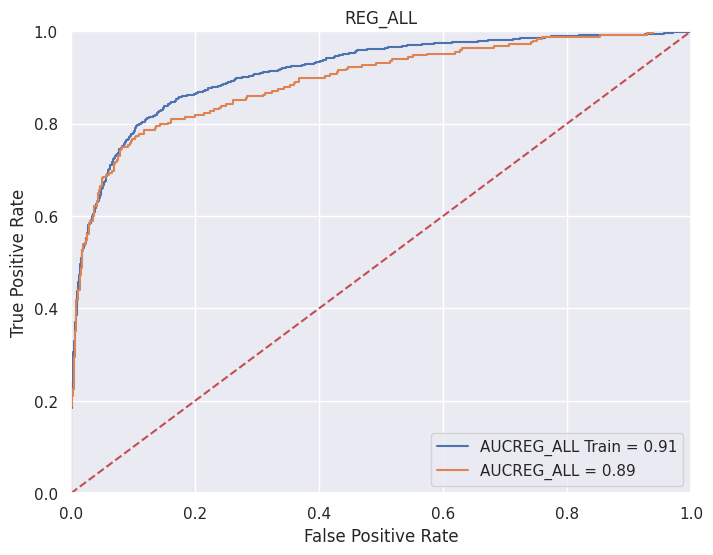

REG_ALL CLASSIFICATION ACCURACY
REG_ALL Train  =  0.8928271812080537
------


REG_ALL  =  0.886744966442953
------



DEFAULT
----------
Total Variables:  28
INTERCEPT  =  -6.193648378925061
LOAN  =  -4.376461957496886e-06
M_MORTDUE  =  0.21583993338849072
IMP_MORTDUE  =  -2.5804523207648796e-06
M_VALUE  =  3.8695667750500724
IMP_VALUE  =  2.830095298276143e-06
M_YOJ  =  -0.6878045223885061
IMP_YOJ  =  -0.015817547858924974
M_DEROG  =  -1.7729710075428833
IMP_DEROG  =  0.5222933869241966
M_DELINQ  =  -0.28424261842954196
IMP_DELINQ  =  0.797117357780071
M_CLAGE  =  1.093426881407531
IMP_CLAGE  =  -0.005271209860626261
M_NINQ  =  0.022638369074038756
IMP_NINQ  =  0.14047711622873882
M_CLNO  =  1.9742834926185213
IMP_CLNO  =  -0.013222168784330909
M_DEBTINC  =  2.6505949420194233
IMP_DEBTINC  =  0.10094070988168212
z_REASON_HomeImp_Yes  =  0.16320356908099712
z_REASON_MISSING_Yes  =  -0.14799542370590696
z_JOB_Mgr_Yes  =  0.8815323483592266
z_JOB_Office_Yes  =  0.2472726254835452
z_JOB_O

In [ ]:
# Regression with All Variables
WHO = "REG_ALL"

CLM = LogisticRegression(solver='newton-cg', max_iter=1000)
CLM = CLM.fit(X_train, Y_train[TARGET_F])

TRAIN_CLM = getProbAccuracyScores(WHO + " Train", CLM, X_train, Y_train[TARGET_F])
TEST_CLM = getProbAccuracyScores(WHO, CLM, X_test, Y_test[TARGET_F])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM])
print_Accuracy(WHO + " CLASSIFICATION ACCURACY", [TRAIN_CLM, TEST_CLM])
getCoefLogit(CLM, X_train)

## Summary
The regression with all variables had similar scores to the what we saw in the classification accuracy. The coefficients themselves mostly make sense. Take YOJ for example, as it is reasonable to assume that someone who has held a stable job for a long time is less likely to default on a loan. We also see something like M_MORTDUE, where you're slightly more likely to default the more you owe on your house.

In [ ]:
# Loss Amount Regression
AMT = LinearRegression()
AMT = AMT.fit(W_train, Z_train[TARGET_A])

TRAIN_AMT = getAmtAccuracyScores(WHO + " Train", AMT, W_train, Z_train[TARGET_A])
TEST_AMT = getAmtAccuracyScores(WHO, AMT, W_test, Z_test[TARGET_A])
print_Accuracy(WHO + " RMSE Accuracy", [TRAIN_AMT, TEST_AMT])

varNames = list(X_train.columns.values)

# Get Coefficients
#REG_ALL_CLM_COEF = getCoefLogit(CLM, X_train)
#REG_ALL_AMT_COEF = getCoefLinear(AMT, X_train)

REG_ALL_CLM = TEST_CLM.copy()
REG_ALL_AMT = TEST_AMT.copy()
#

REG_ALL RMSE Accuracy
REG_ALL Train  =  3613.4726552849975
------


REG_ALL  =  3493.1383897065334
------




## Regression Decision Tree

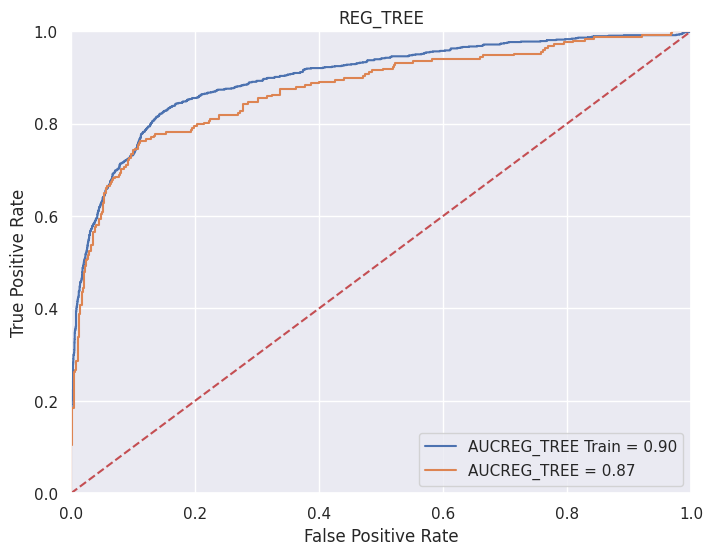

REG_TREE CLASSIFICATION ACCURACY
REG_TREE Train  =  0.8877936241610739
------


REG_TREE  =  0.87751677852349
------




In [ ]:
WHO = "REG_TREE"

CLM = LogisticRegression(solver='newton-cg', max_iter=1000)
CLM = CLM.fit(X_train[vars_tree_flag], Y_train[TARGET_F])

TRAIN_CLM = getProbAccuracyScores(WHO + " Train", CLM, X_train[vars_tree_flag], Y_train[TARGET_F])
TEST_CLM = getProbAccuracyScores(WHO, CLM, X_test[vars_tree_flag], Y_test[TARGET_F])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM])
print_Accuracy(WHO + " CLASSIFICATION ACCURACY", [TRAIN_CLM, TEST_CLM])

In [ ]:
AMT = LinearRegression()
AMT = AMT.fit(W_train[vars_tree_amt], Z_train[TARGET_A])

TRAIN_AMT = getAmtAccuracyScores(WHO + " Train", AMT, W_train[vars_tree_amt], Z_train[TARGET_A])
TEST_AMT = getAmtAccuracyScores(WHO, AMT, W_test[vars_tree_amt], Z_test[TARGET_A])
print_Accuracy(WHO + " RMSE Accuracy", [TRAIN_AMT, TEST_AMT])

varNames = list(X_train.columns.values)
REG_TREE_CLM = TEST_CLM.copy()
REG_TREE_AMT = TEST_AMT.copy()


REG_TREE RMSE Accuracy
REG_TREE Train  =  5128.0038815240705
------


REG_TREE  =  5381.010415951752
------




## Random Forest Regression





LOAN
IMP_MORTDUE
IMP_VALUE
IMP_YOJ
IMP_DEROG
IMP_DELINQ
IMP_CLAGE
IMP_NINQ
IMP_CLNO
M_DEBTINC
IMP_DEBTINC



LOAN
IMP_CLNO


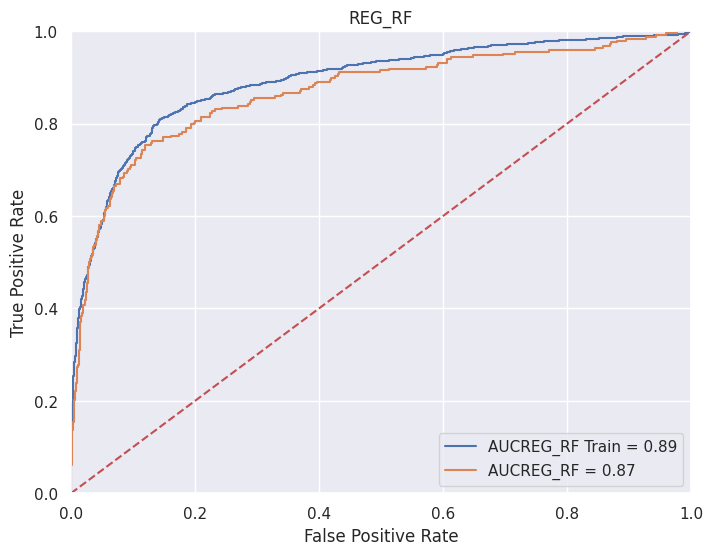

REG_RF CLASSIFICATION ACCURACY
REG_RF Train  =  0.8783557046979866
------


REG_RF  =  0.8741610738255033
------




In [ ]:
WHO = "REG_RF"

print("\n\n")
RF_flag = []
for i in vars_RF_flag:
  print(i)
  #theVar = i[0]
  RF_flag.append(i)

print("\n\n")
RF_amt = []
for i in vars_RF_amt:
  print(i)
  #theVar = i[0]
  RF_amt.append(i)

CLM = LogisticRegression(solver='newton-cg', max_iter=1000)
CLM = CLM.fit(X_train[RF_flag], Y_train[TARGET_F])

TRAIN_CLM = getProbAccuracyScores(WHO + " Train", CLM, X_train[RF_flag], Y_train[TARGET_F])
TEST_CLM = getProbAccuracyScores(WHO, CLM, X_test[RF_flag], Y_test[TARGET_F])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM])
print_Accuracy(WHO + " CLASSIFICATION ACCURACY", [TRAIN_CLM, TEST_CLM])


In [ ]:
# Loss Amount Random Forest
AMT = LinearRegression()
AMT = AMT.fit(W_train[RF_amt], Z_train[TARGET_A])

TRAIN_AMT = getAmtAccuracyScores(WHO + " Train", AMT, W_train[RF_amt], Z_train[TARGET_A])
TEST_AMT = getAmtAccuracyScores(WHO, AMT, W_test[RF_amt], Z_test[TARGET_A])
print_Accuracy(WHO + " RMSE Accuracy", [TRAIN_AMT, TEST_AMT])

varNames = list(X_train.columns.values)
REG_RF_CLM = TEST_CLM.copy()
REG_RF_AMT = TEST_AMT.copy()


REG_RF RMSE Accuracy
REG_RF Train  =  5174.179709091892
------


REG_RF  =  5464.936438631415
------




## Gradient Boosting Regression




IMP_DELINQ
IMP_CLAGE
M_DEBTINC
IMP_DEBTINC



LOAN
IMP_CLNO
M_DEBTINC
IMP_DEBTINC


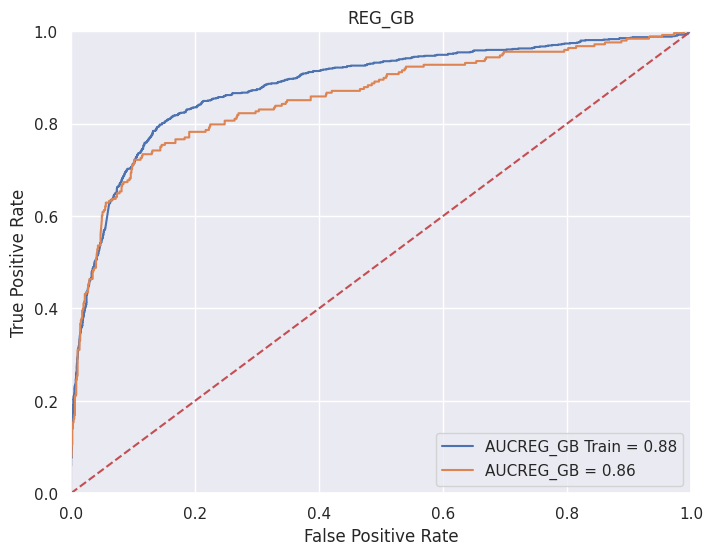

REG_GB CLASSIFICATION ACCURACY
REG_GB Train  =  0.8718540268456376
------


REG_GB  =  0.8674496644295302
------




In [ ]:
WHO = "REG_GB"

print("\n\n")
GB_flag = []
for i in vars_GB_flag:
  print(i)
  #theVar = i[0]
  GB_flag.append(i)

print("\n\n")
GB_amt = []
for i in vars_GB_amt:
  print(i)
  #theVar = i[0]
  GB_amt.append(i)

CLM = LogisticRegression(solver='newton-cg', max_iter=1000)
CLM = CLM.fit(X_train[GB_flag], Y_train[TARGET_F])

TRAIN_CLM = getProbAccuracyScores(WHO + " Train", CLM, X_train[GB_flag], Y_train[TARGET_F])
TEST_CLM = getProbAccuracyScores(WHO, CLM, X_test[GB_flag], Y_test[TARGET_F])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM])
print_Accuracy(WHO + " CLASSIFICATION ACCURACY", [TRAIN_CLM, TEST_CLM])

In [ ]:
# Gradient Boosting Loss Amount Regression
AMT = LinearRegression()
AMT = AMT.fit(W_train[GB_amt], Z_train[TARGET_A])

TRAIN_AMT = getAmtAccuracyScores(WHO + " Train", AMT, W_train[GB_amt], Z_train[TARGET_A])
TEST_AMT = getAmtAccuracyScores(WHO, AMT, W_test[GB_amt], Z_test[TARGET_A])
print_Accuracy(WHO + " RMSE Accuracy", [TRAIN_AMT, TEST_AMT])

REG_GB_CLM = TEST_CLM.copy()
REG_GB_AMT = TEST_AMT.copy()
#

REG_GB RMSE Accuracy
REG_GB Train  =  4408.564694728578
------


REG_GB  =  4465.163660738357
------




## Stepwise Regression

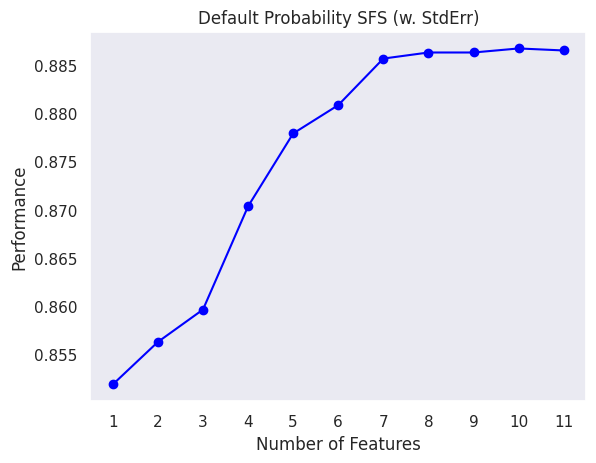

.............
argmax
feature_names    (0, 1, 2, 4, 5, 6, 7, 8, 9, 10)
avg_score                               0.886746
Name: 10, dtype: object
.............
('0', '1', '2', '4', '5', '6', '7', '8', '9', '10')
M_VALUE
IMP_VALUE
M_YOJ
M_DEROG
IMP_DEROG
IMP_DELINQ
IMP_CLAGE
M_DEBTINC
IMP_DEBTINC
z_JOB_Sales_Yes


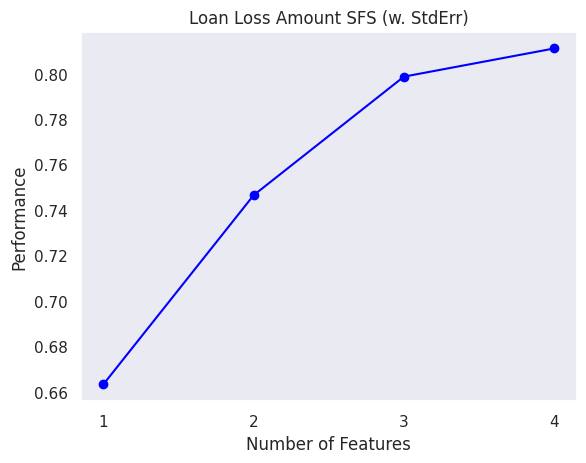

.............
argmax
feature_names    (0, 1, 2, 3)
avg_score            0.811237
Name: 4, dtype: object
.............
('0', '1', '2', '3')
LOAN
IMP_CLNO
M_DEBTINC
IMP_DEBTINC


In [ ]:
# Stepwise Regression
U_train = X_train[vars_tree_flag]
stepVarNames = list(U_train.columns.values)
maxCols = U_train.shape[1]

sfs = SFS(LogisticRegression(solver='newton-cg', max_iter=1000),
    k_features= (1, maxCols),
    forward=True,
    floating=False,
    cv=3
    )
sfs.fit(U_train.values, Y_train[TARGET_F].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None)
plt.title("Default Probability SFS (w. StdErr)")
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
dfm = dfm[['feature_names', 'avg_score']]
dfm.avg_score = dfm.avg_score.astype(float)

print(".............")
maxIndex =dfm.avg_score.argmax()
print("argmax")
print(dfm.iloc[maxIndex,])
print(".............")

stepVars = dfm.iloc[maxIndex,]
stepVars = stepVars.feature_names
print(stepVars)

finalStepVars = []
for i in stepVars:
  index = int(i)
  try:
    theName = stepVarNames[index]
    finalStepVars.append(theName)
  except:
    pass

for i in finalStepVars:
  print(i)

U_train = X_train[finalStepVars]
U_test = X_test[finalStepVars]

V_train = W_train[GB_amt]
stepVarNames = list(V_train.columns.values)
maxCols = V_train.shape[1]

sfs = SFS (LinearRegression(),
    k_features= (1, maxCols),
    forward=True,
    floating=False,
    scoring = 'r2',
    cv=5
    )
sfs.fit(V_train.values, Z_train[TARGET_A].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None)
plt.title("Loan Loss Amount SFS (w. StdErr)")
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
dfm = dfm[['feature_names', 'avg_score']]
dfm.avg_score = dfm.avg_score.astype(float)

print(".............")
maxIndex =dfm.avg_score.argmax()
print("argmax")
print(dfm.iloc[maxIndex,])
print(".............")

stepVars = dfm.iloc[maxIndex,]
stepVars = stepVars.feature_names
print(stepVars)

finalStepVars = []
for i in stepVars:
  index = int(i)
  try:
    theName = stepVarNames[index]
    finalStepVars.append(theName)
  except:
    pass

for i in finalStepVars:
  print(i)

V_train = W_train[finalStepVars]
V_test = W_test[finalStepVars]

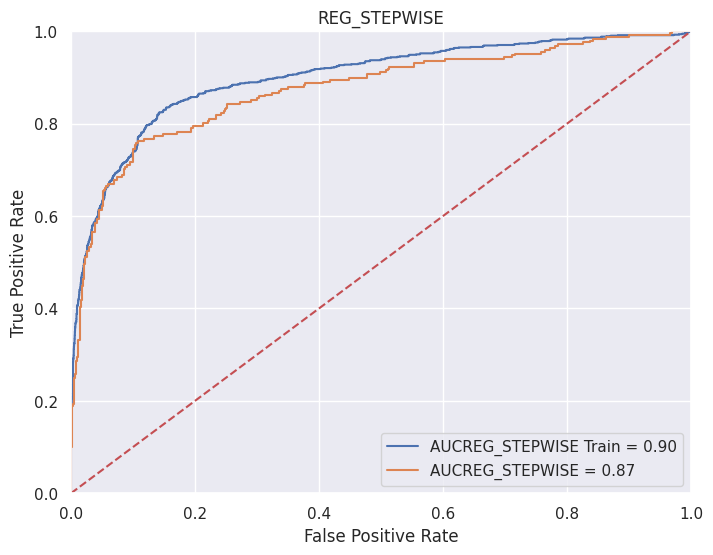

REG_STEPWISE CLASSIFICATION ACCURACY
REG_STEPWISE Train  =  0.8875838926174496
------


REG_STEPWISE  =  0.8808724832214765
------


REG_STEPWISE RMSE Accuracy
REG_STEPWISE Train  =  4408.564694728578
------


REG_STEPWISE  =  4465.163660738357
------




In [ ]:
# Regression
WHO = "REG_STEPWISE"

CLM = LogisticRegression(solver='newton-cg', max_iter=1000)
CLM = CLM.fit(U_train, Y_train[TARGET_F])

TRAIN_CLM = getProbAccuracyScores(WHO + " Train", CLM, U_train, Y_train[TARGET_F])
TEST_CLM = getProbAccuracyScores(WHO, CLM, U_test, Y_test[TARGET_F])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM])
print_Accuracy(WHO + " CLASSIFICATION ACCURACY", [TRAIN_CLM, TEST_CLM])

# Loss Amount
AMT = LinearRegression()
AMT = AMT.fit(V_train, Z_train[TARGET_A])

TRAIN_AMT = getAmtAccuracyScores(WHO + " Train", AMT, V_train, Z_train[TARGET_A])
TEST_AMT = getAmtAccuracyScores(WHO, AMT, V_test, Z_test[TARGET_A])
print_Accuracy(WHO + " RMSE Accuracy", [TRAIN_AMT, TEST_AMT])

REG_STEP_CLM = TEST_CLM.copy()
REG_STEP_AMT = TEST_AMT.copy()


#

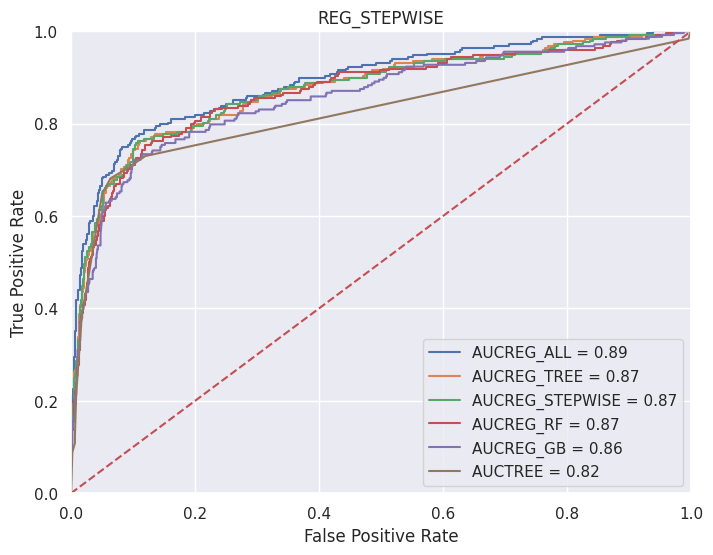

ALL CLASSIFICATION ACCURACY
TREE  =  0.8875838926174496
------


REG_ALL  =  0.886744966442953
------


REG_STEPWISE  =  0.8808724832214765
------


REG_TREE  =  0.87751677852349
------


REG_RF  =  0.8741610738255033
------


REG_GB  =  0.8674496644295302
------


ALL LOAN LOSS MODEL ACCURACY
REG_ALL  =  3493.1383897065334
------


REG_GB  =  4465.163660738357
------


REG_STEPWISE  =  4465.163660738357
------


REG_TREE  =  5381.010415951752
------


REG_RF  =  5464.936438631415
------


TREE  =  6809.8980977949295
------




In [ ]:
# Putting all the models together
ALL_CLM = [TREE_CLM, REG_ALL_CLM, REG_TREE_CLM, REG_RF_CLM, REG_GB_CLM, REG_STEP_CLM]

ALL_CLM = sorted(ALL_CLM, key=lambda x: x[4], reverse=True)
print_ROC_Curve(WHO, ALL_CLM)

ALL_CLM = sorted(ALL_CLM, key=lambda x: x[1], reverse=True)
print_Accuracy("ALL CLASSIFICATION ACCURACY", ALL_CLM)

ALL_AMT = [TREE_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, REG_STEP_AMT]
ALL_AMT = sorted(ALL_AMT, key=lambda x: x[1])
print_Accuracy("ALL LOAN LOSS MODEL ACCURACY", ALL_AMT)
#

## Takeaways
When examining the Logistic Regressions for each model we see that all four performed similarly. The REG_ALL, REG_TREE, REG_RF, REG_GB all come in between 86-89% accuracy for the loan default prediction.

The loss amounts we get from the Linear Regression model are interesting. The Tree, RF, and GB models display similar amounts. The Tree and RF are the closest, ranging from roughly $5100 - $5400. The GB comes in a little lower predicting loss amounts in the $4000 range. The interesting part is that the REG_ALL amounts are much lower than the amounts in the rest of the models.

It should be noted, that unlike the classification tests, the training data sets in all the models actually had a higher percentage than the test data, albeit they were very close.

If I had to choose a model for the regression, I would choose the Decision Tree, as it was the most accurate.

## Tensorflow Loan Default Model

In [ ]:
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
theScaler = MinMaxScaler()
theScaler.fit(X_train)


MinMaxScaler()

In [ ]:
def get_TF_ProbAccuracyScores(NAME, MODEL, X, Y):
  probs = MODEL.predict(X)
  pred_list = []
  for p in probs:
    pred_list.append(np.argmax(p))
  pred = np.array(pred_list)
  acc_score = metrics.accuracy_score(Y, pred)
  p1 = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(Y, p1)
  auc = metrics.auc(fpr,tpr)
  return [NAME, acc_score, fpr, tpr, auc]



In [ ]:
WHO = "Tensor_Flow"

# Create new variable for scaler
U_train = theScaler.transform(X_train)
U_test = theScaler.transform(X_test)

# Convert to df with column names
U_train = pd.DataFrame(U_train)
U_test = pd.DataFrame(U_test)

U_train.columns = list(X_train.columns.values)
U_test.columns = list(X_test.columns.values)

# Variable selection
U_train = U_train[GB_flag]
U_test = U_test[GB_flag]



One Hidden Layer

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


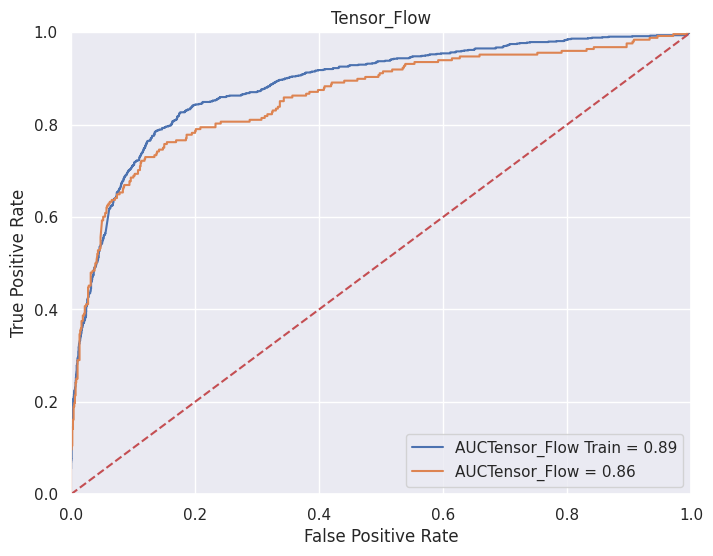

Tensor_Flow CLASSIFICATION ACCURACY
Tensor_Flow Train  =  0.8703859060402684
------


Tensor_Flow  =  0.8657718120805369
------




In [ ]:
# Create flag variables using keras
F_ShapeSize = U_train.shape[1]
F_Activation = tf.keras.activations.relu
F_LossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
F_Optimizer = tf.keras.optimizers.Adam()
F_Epochs = 100

F_Units = int(2*F_ShapeSize)
F_Layer_1 = tf.keras.layers.Dense(F_Units, activation=F_Activation, input_dim=F_ShapeSize)
#F_Drop = tf.keras.layers.Dropout(0.2)
#F_Layer_2 = tf.keras.layers.Dense(F_Units, activation=F_Activation)
F_Layer_Output = tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax)

CLM = tf.keras.Sequential()
CLM.add(F_Layer_1)
CLM.add(F_Layer_Output)
CLM.compile(loss=F_LossMetric, optimizer=F_Optimizer)
CLM.fit(U_train, Y_train[TARGET_F], epochs=F_Epochs, verbose=False)

TRAIN_CLM = get_TF_ProbAccuracyScores(WHO + " Train", CLM, U_train, Y_train[TARGET_F])
TEST_CLM = get_TF_ProbAccuracyScores(WHO, CLM, U_test, Y_test[TARGET_F])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM])
print_Accuracy(WHO + " CLASSIFICATION ACCURACY", [TRAIN_CLM, TEST_CLM])



Two Hidden Layers and Drop Layer

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


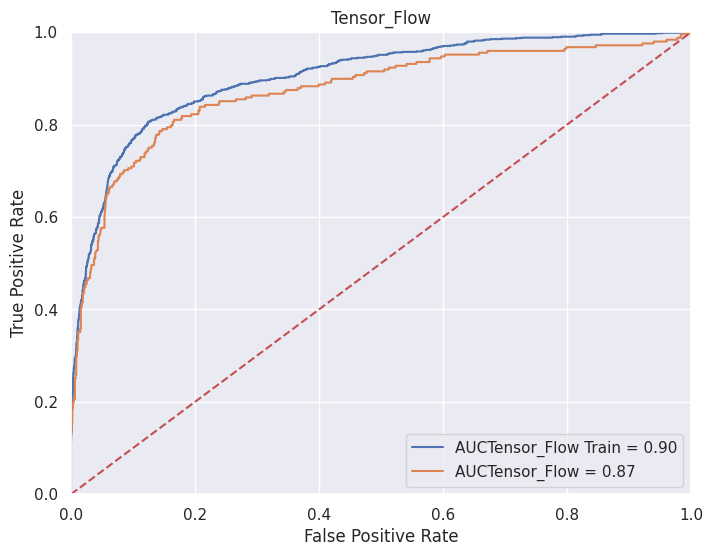

Tensor_Flow CLASSIFICATION ACCURACY
Tensor_Flow Train  =  0.8695469798657718
------


Tensor_Flow  =  0.8489932885906041
------




In [ ]:
# Create flag variables using keras
F_ShapeSize = U_train.shape[1]
F_Activation = tf.keras.activations.relu
F_LossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
F_Optimizer = tf.keras.optimizers.Adam()
F_Epochs = 400

F_Units = int(2*F_ShapeSize)
F_Layer_1 = tf.keras.layers.Dense(F_Units, activation=F_Activation, input_dim=F_ShapeSize)
F_Drop = tf.keras.layers.Dropout(0.2)
F_Layer_2 = tf.keras.layers.Dense(F_Units, activation=F_Activation)
F_Layer_Output = tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax)

CLM = tf.keras.Sequential()
CLM.add(F_Layer_1)
CLM.add(F_Drop)
CLM.add(F_Layer_2)
CLM.add(F_Layer_Output)
CLM.compile(loss=F_LossMetric, optimizer=F_Optimizer)
CLM.fit(U_train, Y_train[TARGET_F], epochs=F_Epochs, verbose=False)

TRAIN_CLM = get_TF_ProbAccuracyScores(WHO + " Train", CLM, U_train, Y_train[TARGET_F])
TEST_CLM = get_TF_ProbAccuracyScores(WHO, CLM, U_test, Y_test[TARGET_F])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM])
print_Accuracy(WHO + " CLASSIFICATION ACCURACY", [TRAIN_CLM, TEST_CLM])


### Summary
By using two hidden layers and including the drop layer into the tensorflow model, we were able to close the gap between the training data set and the test data set, bringing them much closer together.

## Tensorflow Loss Amount Model

In [ ]:
V_train = theScaler.transform(W_train)
V_test = theScaler.transform(W_test)

V_train = pd.DataFrame(V_train)
V_test = pd.DataFrame(V_test)

V_train.columns = list(W_train.columns.values)
V_test.columns = list(W_test.columns.values)

V_train = V_train[GB_amt]
V_test = V_test[GB_amt]

One Hidden Layer

In [ ]:
A_ShapeSize = V_train.shape[1]
A_Activation = tf.keras.activations.relu
A_LossMetric = tf.keras.losses.MeanSquaredError()
A_Optimizer = tf.keras.optimizers.Adam()
A_Epochs = 100

A_Units = int(2*A_ShapeSize)
A_Layer_1 = tf.keras.layers.Dense(A_Units, activation=A_Activation, input_dim=A_ShapeSize)
#A_Drop = tf.keras.layers.Dropout(0.2)
#A_Layer_2 = tf.keras.layers.Dense(A_Units, activation=A_Activation)
A_Layer_Output = tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)

AMT = tf.keras.Sequential()
AMT.add(A_Layer_1)
#AMT.add(A_Drop)
#AMT.add(A_Layer_2)
AMT.add(A_Layer_Output)
AMT.compile(loss=A_LossMetric, optimizer=A_Optimizer)
AMT.fit(V_train, Z_train[TARGET_A], epochs=A_Epochs, verbose=False)

TRAIN_AMT = getAmtAccuracyScores(WHO + " Train", AMT, V_train, Z_train[TARGET_A])
TEST_AMT = getAmtAccuracyScores(WHO, AMT, V_test, Z_test[TARGET_A])
print_Accuracy(WHO + " RMSE Accuracy", [TRAIN_AMT, TEST_AMT])

TF_CLM = TEST_CLM.copy()
TF_AMT = TEST_AMT.copy()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Tensor_Flow RMSE Accuracy
Tensor_Flow Train  =  16989.14506692474
------


Tensor_Flow  =  17495.98027225432
------




## Summary
With one hidden layer, the training loss amount is lower than the test loss amount.

Two Hidden Layers and Drop Layer

In [ ]:
A_ShapeSize = V_train.shape[1]
A_Activation = tf.keras.activations.relu
A_LossMetric = tf.keras.losses.MeanSquaredError()
A_Optimizer = tf.keras.optimizers.Adam()
A_Epochs = 100

A_Units = int(2*A_ShapeSize)
A_Layer_1 = tf.keras.layers.Dense(A_Units, activation=A_Activation, input_dim=A_ShapeSize)
A_Drop = tf.keras.layers.Dropout(0.2)
A_Layer_2 = tf.keras.layers.Dense(A_Units, activation=A_Activation)
A_Layer_Output = tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)

AMT = tf.keras.Sequential()
AMT.add(A_Layer_1)
AMT.add(A_Drop)
AMT.add(A_Layer_2)
AMT.add(A_Layer_Output)
AMT.compile(loss=A_LossMetric, optimizer=A_Optimizer)
AMT.fit(V_train, Z_train[TARGET_A], epochs=A_Epochs, verbose=False)

TRAIN_AMT = getAmtAccuracyScores(WHO + " Train", AMT, V_train, Z_train[TARGET_A])
TEST_AMT = getAmtAccuracyScores(WHO, AMT, V_test, Z_test[TARGET_A])
print_Accuracy(WHO + " RMSE Accuracy", [TRAIN_AMT, TEST_AMT])

TF_CLM = TEST_CLM.copy()
TF_AMT = TEST_AMT.copy()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Tensor_Flow RMSE Accuracy
Tensor_Flow Train  =  11426.184658455679
------


Tensor_Flow  =  12169.910725303864
------




## Summary
When adding two hidden layers and the drop layer, overall, the loss amounts found from a loan default in both data sets is lower than the model using one layer. The test data set still results in a higher amount than the training data, but is significantly (~$5,000) lower than that of the model with one layer.

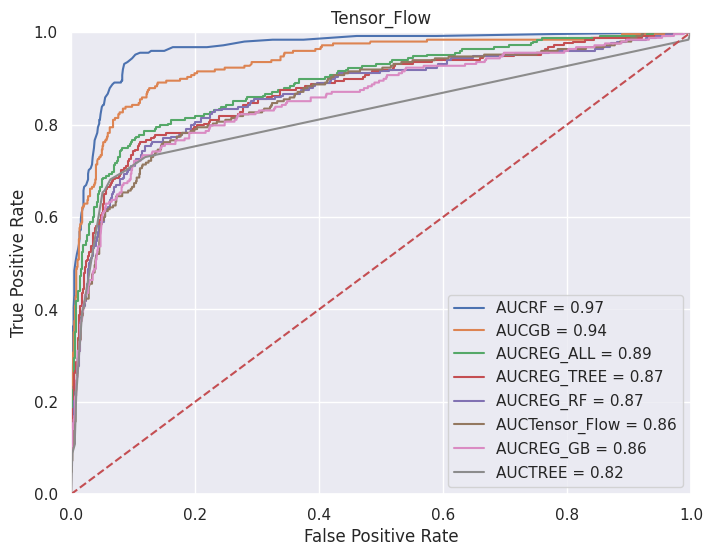

ALL CLASSIFICATION ACCURACY
RF  =  0.915268456375839
------


GB  =  0.9035234899328859
------


TREE  =  0.8875838926174496
------


REG_ALL  =  0.886744966442953
------


REG_TREE  =  0.87751677852349
------


REG_RF  =  0.8741610738255033
------


REG_GB  =  0.8674496644295302
------


Tensor_Flow  =  0.8657718120805369
------


ALL LOAN LOSS MODEL ACCURACY
GB  =  2590.3224139226977
------


REG_ALL  =  3493.1383897065334
------


REG_GB  =  4465.163660738357
------


REG_TREE  =  5381.010415951752
------


REG_RF  =  5464.936438631415
------


RF  =  5634.178003041123
------


TREE  =  6809.8980977949295
------


Tensor_Flow  =  12169.910725303864
------




In [ ]:
# Putting all the models together
ALL_CLM = [TREE_CLM, REG_ALL_CLM, REG_TREE_CLM, REG_RF_CLM, REG_GB_CLM, RF_CLM, GB_CLM, TF_CLM]

ALL_CLM = sorted(ALL_CLM, key=lambda x: x[4], reverse=True)
print_ROC_Curve(WHO, ALL_CLM)

ALL_CLM = sorted(ALL_CLM, key=lambda x: x[1], reverse=True)
print_Accuracy("ALL CLASSIFICATION ACCURACY", ALL_CLM)

ALL_AMT = [TREE_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, RF_AMT, GB_AMT, TF_AMT]
ALL_AMT = sorted(ALL_AMT, key=lambda x: x[1])
print_Accuracy("ALL LOAN LOSS MODEL ACCURACY", ALL_AMT)

## Takeaways
The RF and GB models performed much higher than the rest. The Tensor Flower model actually landed on the lower end of all the accuracy scores. Based on the accuracy scores and ROC curves, it would be suggested to choose the RF and GB models for the highet accuracy.

When it comes to the actual loss amounts from a loan default, the Tensor Flow model far and away predicts the highest loss amount. Given the accuracy scores from the default models, it is likely that the RF and GB loss amounts are the closes to what one should actually expect.

Even with two layers, the drop layer, and increasing the number of epochs to be included in the model, the Tensor Flow model does not perform as well compared to the others.

In [ ]:
!jupyter nbconvert --to html HMEQ_Assignment_4.ipynb

[NbConvertApp] Converting notebook HMEQ_Assignment_4.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 31 image(s).
[NbConvertApp] Writing 2009089 bytes to HMEQ_Assignment_4.html
